# Capstone Project: Airbnb Prediciting Prices 
____

In [368]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Dropout, Input

from sklearn.model_selection import cross_val_predict, cross_val_score

import pickle

In [369]:
# Reading dataset
listing = pd.read_csv('../data/listings_model.csv')

In [370]:
listing.columns

Index(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'bathrooms_type', 'bathrooms_nbr',
       'neigh_price_sqft', 'description_count', 'description_words',
       'amenities_count'],
      dtype='object')

# 3. Pre-Processing Data 
____

Check Distribution Data 
Check Outliers
Visualizations:
    - Barcharts by accomodation type
    - Scatter plot price acomodation (type accomodation legend) (?)
    - Map location lat/log (Folium) (?)
    - Time/price (?)     


In [371]:
listing.shape

(22183, 24)

In [372]:
listing['room_type'].value_counts()

Entire home/apt    11942
Private room        9843
Shared room          336
Hotel room            62
Name: room_type, dtype: int64

In [373]:
listing[listing['room_type']=='Private room'].loc[0]

host_is_superhost                                                               0
host_verifications                                             ['email', 'phone']
host_has_profile_pic                                                            1
host_identity_verified                                                          1
neighbourhood_cleansed                                                 kensington
neighbourhood_group_cleansed                                             Brooklyn
latitude                                                                 40.64529
longitude                                                               -73.97238
room_type                                                            Private room
accommodates                                                                    2
bedrooms                                                                      1.0
beds                                                                          1.0
price           

In [374]:
listing.shape

(22183, 24)

In [375]:
#listing = listing[listing['room_type']=='Entire home/apt']
#listing = listing[listing['room_type']=='Private room']
#listing.drop(columns='room_type', inplace=True)
#listing.shape

In [376]:
df  = listing.copy()
# Running model only on Private room
#df = listing[listing['room_type']=='Private room']

In [377]:
df.columns

Index(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'bathrooms_type', 'bathrooms_nbr',
       'neigh_price_sqft', 'description_count', 'description_words',
       'amenities_count'],
      dtype='object')

In [378]:
df.drop( columns=['host_verifications', 'neighbourhood_group_cleansed',
                'longitude', 'description_words', 'description_count','number_of_reviews'], #'latitude','
         inplace=True)

In [379]:
df.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'instant_bookable', 'bathrooms_type',
       'bathrooms_nbr', 'neigh_price_sqft', 'amenities_count'],
      dtype='object')

In [380]:
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,instant_bookable,bathrooms_type,bathrooms_nbr,neigh_price_sqft,amenities_count
0,0,1,1,kensington,40.64529,Private room,2,1.0,1.0,299.0,30,730,4.89,0,shared,1.0,2.77,557
1,1,1,1,bedford-stuyvesant,40.68535,Private room,2,1.0,1.0,60.0,30,730,4.52,0,private,0.0,2.83,77
2,0,1,1,sunset park,40.66265,Entire home/apt,4,2.0,2.0,275.0,21,1125,5.00,0,private,1.5,2.31,386
3,1,1,1,greenpoint,40.73777,Hotel room,2,1.0,1.0,308.0,2,365,4.90,0,private,1.0,3.83,432
4,0,1,1,east village,40.72322,Private room,2,1.0,2.0,55.0,2,60,4.34,0,shared,1.5,5.71,266


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22183 entries, 0 to 22182
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       22183 non-null  int64  
 1   host_has_profile_pic    22183 non-null  int64  
 2   host_identity_verified  22183 non-null  int64  
 3   neighbourhood_cleansed  22183 non-null  object 
 4   latitude                22183 non-null  float64
 5   room_type               22183 non-null  object 
 6   accommodates            22183 non-null  int64  
 7   bedrooms                22183 non-null  float64
 8   beds                    22183 non-null  float64
 9   price                   22183 non-null  float64
 10  minimum_nights          22183 non-null  int64  
 11  maximum_nights          22183 non-null  int64  
 12  review_scores_rating    22183 non-null  float64
 13  instant_bookable        22183 non-null  int64  
 14  bathrooms_type          22183 non-null

## 3.1. Dummifying

In [382]:
df.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'instant_bookable', 'bathrooms_type',
       'bathrooms_nbr', 'neigh_price_sqft', 'amenities_count'],
      dtype='object')

In [383]:
# Setting category columns to Dummify
col_dummies = ['neighbourhood_cleansed', 'bathrooms_type','room_type' ] #'neighbourhood_group_cleansed','room_type'

In [384]:
df.shape

(22183, 18)

In [385]:
df = pd.get_dummies(df, prefix_sep="__", columns = col_dummies, drop_first = True);

In [386]:
df.shape

(22183, 172)

In [387]:
#df.to_csv('../data/listing_preprocess.csv', index=False)

## 3.2. Creating X and y 

In [388]:
X = df.drop(columns='price')
y = np.log(df['price'])
print(X.shape)
print(y.shape)

(22183, 171)
(22183,)


In [389]:
X_train, X_test, y_train, y_test = train_test_split(
        X,  
        y,
        test_size = 0.3,     
        random_state = 42
 )

In [390]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15528, 171), (6655, 171), (15528,), (6655,))

## 3.3. Scaling Data

In [391]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# 4. Machine Learning Models
____

## 4.1. Baseline Model

In [392]:
#Setting a Baseline and getting its Score
baseline_model = [y_train.mean()] * len(y_test)
r2_score(y_test, baseline_model)

-0.00019758509399592228

### Fitting Linear Regression Model
___

In [393]:
#Fitting Model
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [394]:
#Cross Vaditadion Score
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()
# -3.3924557963554062e+25

-2.52333141395823e+26

In [395]:
# Calcuate residual
lr_y_preds = np.exp(lr.predict(X_train_sc))
residuals = y_train - lr_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, lr_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, lr_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, lr_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, lr_y_preds)}')
#MAE: 129.81014920371308
#MSE: 21210.975157781893
#RMSE: 145.63988175558882
#R2: -55534.009329901186

MAE: 130.905234268579
MSE: 21963.881985130003
RMSE: 148.20216592590677
R2: -57334.21982352079


In [396]:
#Comparing scores
print(f'Train set: {lr.score(X_train_sc, y_train)}')
print(f'Test set: {lr.score(X_test_sc, y_test)}')
print(f'Diference (train/test): {lr.score(X_train_sc, y_train)-lr.score(X_test_sc, y_test)}')

#Train set: 0.6306346195368164
#Test set: -3.790486871672232e+20
#Diference (train/test): 3.790486871672232e+20


Train set: 0.6321983618367985
Test set: -1.3768383703972706e+21
Diference (train/test): 1.3768383703972706e+21


In [397]:
# Creating a list of coeficients
list_coef = list(zip( lr.coef_, X.columns))

In [398]:
# Turn it into a data frame
pd.DataFrame(lr.coef_, index = X.columns, columns = ['Coefficient'])

,Coefficient
host_is_superhost,2.821642e-02
host_has_profile_pic,-1.099332e-02
host_identity_verified,3.405109e-03
latitude,1.030908e-02
accommodates,1.361529e-01
...,...
neighbourhood_cleansed__woodside,-7.708692e+09
bathrooms_type__shared,-8.919144e-02
room_type__Hotel room,1.879692e-02
room_type__Private room,-1.796527e-01


### Residuals
___

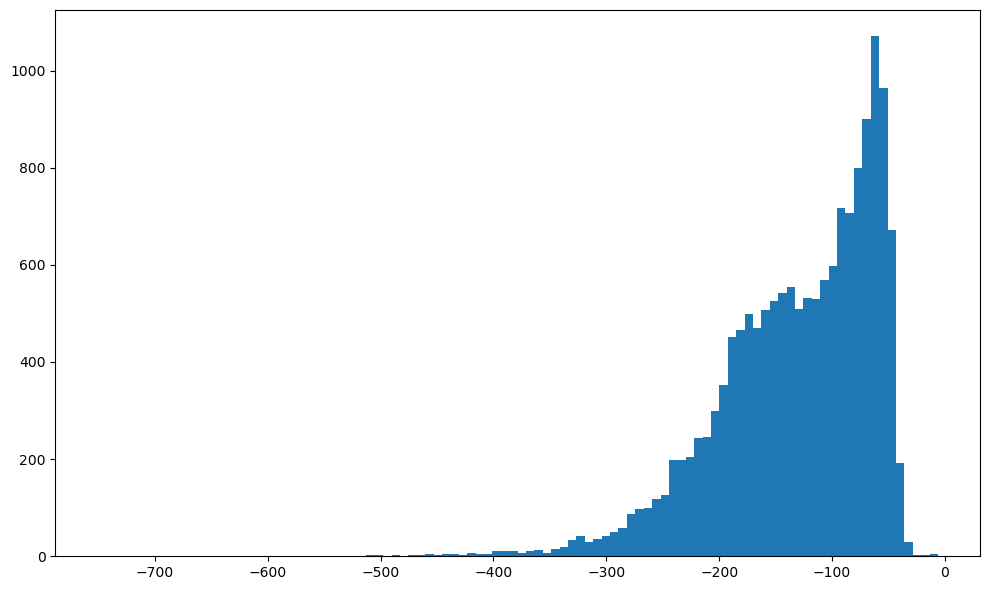

In [399]:
# Normality assumption 
plt.figure(figsize = (10, 6))
plt.hist(residuals, bins = 100);
plt.tight_layout()

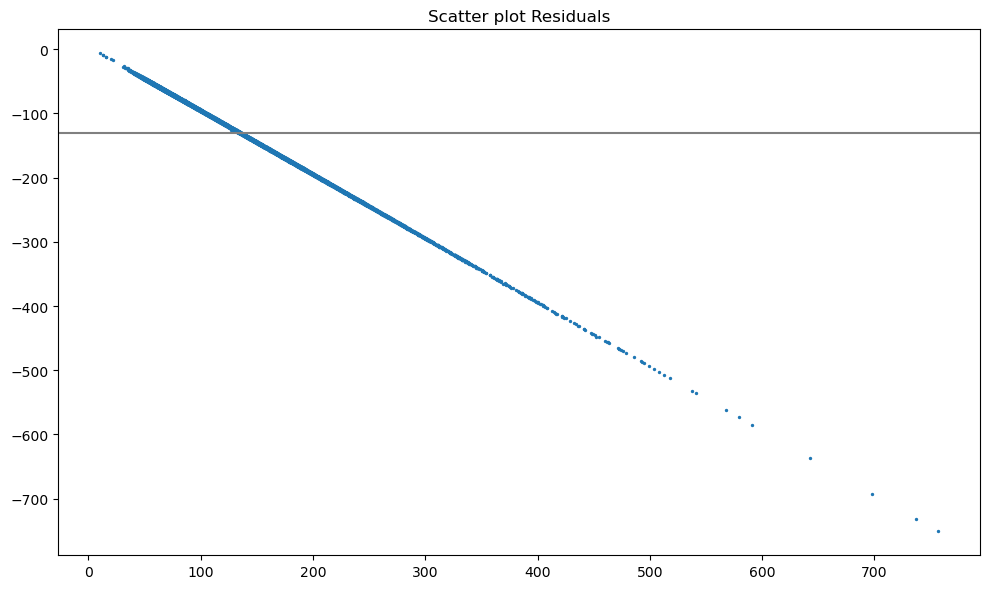

In [400]:
# Normality assumption 
plt.figure(figsize = (10,6))
plt.title("Scatter plot Residuals")
#Ploting Residuals - Scatter Plotf SLR Model 
plt.scatter(lr_y_preds, residuals,s=2);
plt.axhline(residuals.mean(), color='grey');
plt.tight_layout()

## 4.2. Lasso Regularization

In [401]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_sc, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [402]:
# Here is the optimal value of alpha
print("Best Value of alpha: ",lasso_cv.alpha_)

# Scores on Train a
print("Lasson Train Score: ", lasso_cv.score(X_train_sc, y_train))
print("Lasso Test Score", lasso_cv.score(X_test_sc, y_test))

Best Value of alpha:  0.0016297508346206436
Lasson Train Score:  0.6520600188114305
Lasso Test Score 0.6362987358429693


In [403]:
# Calcuate residual
lasso_y_preds = np.exp(lasso_cv.predict(X_train_sc))
residuals = y_train - lasso_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, lasso_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, lasso_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, lasso_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, lasso_y_preds)}')

MAE: 129.83101391938297
MSE: 21281.535131747663
RMSE: 145.88192188118327
R2: -55552.99977958453


## 4.3. Ridge Regularization

In [404]:
# Instantiate.
ridge = Ridge(alpha = 100)

# Fit.
ridge.fit(X_train_sc, y_train)

# Evaluate model using R2.
print(f'Training Score: {ridge.score(X_train_sc, y_train)}')
print(f'Testing Score: {ridge.score(X_test_sc, y_test)}')

Training Score: 0.6530286770043647
Testing Score: 0.6348298958183168


In [405]:
# Calcuate residual
ridge_y_preds = np.exp(ridge.predict(X_train_sc))
residuals = y_train - ridge_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, ridge_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, ridge_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, ridge_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, ridge_y_preds)}')

MAE: 130.09644489164933
MSE: 21446.079687456328
RMSE: 146.44480082084283
R2: -55982.532149076724


## 4.4. KNNeighbors Regressor


In [406]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# define the grid search
knn_grid= GridSearchCV(KNeighborsRegressor(), param_grid=knn_params, cv=5, verbose = -1)
knn_grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             verbose=-1)

In [407]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}

In [408]:
print(f'Training Score: {knn_grid.score(X_train_sc, y_train)}')
print(f'Testing Score: {knn_grid.score(X_test_sc, y_test)}')

# Calcuate residual
knn_grid_y_preds = np.exp(knn_grid.best_estimator_.predict(X_train_sc))
residuals = y_train - knn_grid_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, knn_grid_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, knn_grid_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, knn_grid_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, knn_grid_y_preds)}')

Training Score: 0.7171547353026566
Testing Score: 0.6367074193300511
MAE: 128.5596859299936
MSE: 20893.183422838534
RMSE: 144.5447454003034
R2: -54539.23406120107


In [409]:
knn = KNeighborsRegressor(n_neighbors=5, p=2)
knn.fit(X_train_sc, y_train)

print(f'Training Score: {knn.score(X_train_sc, y_train)}')
print(f'Testing Score: {knn.score(X_test_sc, y_test)}')

# Calcuate residual
knn_y_preds = np.exp(knn.predict(X_train_sc))
residuals = y_train - knn_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, knn_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, knn_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, knn_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, knn_y_preds)}')

Training Score: 0.7506849327550738
Testing Score: 0.611784620963719
MAE: 130.6766009328454
MSE: 21939.11375940596
RMSE: 148.118580061402
R2: -57269.56405513303


## 4.5. CART 

In [410]:
# Instantiate model with:
# - a maximum depth of .
# - at least  samples required in order to split an internal node.
# - at least  samples in each leaf node.
# - a cost complexity of 0.01.
# - random state of 42.

dt_params = {
    'max_depth': [2, 3, 5, 7],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'ccp_alpha': [0.001, 0.01, 0.1, 1, 10]
}

dt_grid = GridSearchCV(
                    estimator = DecisionTreeRegressor(random_state=42),
                    param_grid = dt_params,
                    cv = 5,
                    verbose = 1)

# GridSearch!
dt_grid.fit(X_train_sc, y_train)

# What is our best decision tree?
print("Best Estimator: ", dt_grid.best_estimator_)

# What was the cross-validated score of the above decision tree?
print("Best Score: ", dt_grid.best_score_)

# Evaluate model.
print(f'Score on training set: {dt_grid.score(X_train_sc, y_train)}')
print(f'Score on testing set: {dt_grid.score(X_test_sc, y_test)}')


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Estimator:  DecisionTreeRegressor(ccp_alpha=0.001, max_depth=7, min_samples_leaf=2,
                      min_samples_split=10, random_state=42)
Best Score:  0.6147021180816404
Score on training set: 0.6244990075710447
Score on testing set: 0.6039309359709839


In [411]:
# Calcuate residual
dt_y_preds = np.exp(dt_grid.best_estimator_.predict(X_train_sc))
residuals = y_train - dt_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, dt_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, dt_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, dt_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, dt_y_preds)}')

MAE: 129.07575291467955
MSE: 20488.66911379518
RMSE: 143.13863599250615
R2: -53483.276974632194


## 4.6. Random Forest

In [412]:
# Taking 47 min to run
# Gridsearch Parameters
rf_params = {
    'n_estimators': [200, 250, 300, 400],
    'min_samples_leaf': [2, 3, 4, 5],
    'max_depth' : [None, 3, 4, 5, 6],
    'n_jobs': [-1]
}
# Setting Gridsearch
rf_grid = GridSearchCV(
    estimator = RandomForestRegressor(), 
    param_grid = rf_params, 
    cv = 5
)
# Fitting Model
rf_grid.fit(X_train_sc, y_train)

# Printing Outputs
print(f'Best Score : {rf_grid.best_score_}')
print(f'Best Parameters: {rf_grid.best_params_}') 
print(f'Score on training set: {rf_grid.score(X_train_sc, y_train)}')
print(f'Score on test set: {rf_grid.score(X_test_sc, y_test)}')

Best Score : 0.7056320376638704
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 400, 'n_jobs': -1}
Score on training set: 0.9313826508625533
Score on test set: 0.6906297661702103


In [413]:
# Calcuate residual
rf_y_preds = np.exp(rf_grid.best_estimator_.predict(X_train_sc))
residuals = y_train - rf_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, rf_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, rf_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, rf_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, rf_y_preds)}')

MAE: 133.46714225016947
MSE: 23268.440440651048
RMSE: 152.5399634215606
R2: -60739.68092873757


## 4.7. Neural Network

In [414]:
def model_fn(h1_neurons = 32, h2_neurons=32, drop = 0.5):
  
  print(f'h1: {h1_neurons}, h2: {h2_neurons}, drop: {drop}')
  
  inputs = Input(shape = (X_train_sc.shape[1],))
  
  h1 = Dense(h1_neurons, activation = 'relu')(inputs)
  d1 = Dropout(drop)(h1)
  
  h2 = Dense(h2_neurons, activation = 'relu')(d1)
  out = Dense(1, activation = None)(h2)

  model = Model(inputs = inputs, outputs = out)

  model.compile(loss = 'mse',
                optimizer = 'adam', 
                metrics='acc')
  
  return model

In [415]:
# kind of like when lr = LinearRegression()
nn = KerasRegressor(build_fn = model_fn, batch_size = 256, verbose = 0)

In [416]:
params = {
    'epochs': [100],
    'h1_neurons': [16, 64, 128],
    'h2_neurons': [64, 128],
    'drop':[0.1,0.25, 0.5]
}

In [417]:
# 19 min to run
nn_grid = GridSearchCV(nn, param_grid = params, cv = 3)
nn_grid.fit(X_train_sc, y_train)

h1: 16, h2: 64, drop: 0.1


2022-11-13 20:20:22.710811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:20:41.098024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.1


2022-11-13 20:20:41.760812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:20:59.258287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.1


2022-11-13 20:20:59.673621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:21:18.511516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.1


2022-11-13 20:21:19.592908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:21:37.734176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.1


2022-11-13 20:21:38.111806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:21:57.133751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.1


2022-11-13 20:21:57.489406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:22:18.282315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.1


2022-11-13 20:22:18.614655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:22:38.979794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.1


2022-11-13 20:22:39.948274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:23:00.942255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.1


2022-11-13 20:23:01.322636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:23:20.072255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.1


2022-11-13 20:23:20.389465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:23:38.792590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.1


2022-11-13 20:23:39.183818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:23:59.500633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.1


2022-11-13 20:24:00.265989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:24:20.105451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.1


2022-11-13 20:24:20.564295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:24:41.141340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.1


2022-11-13 20:24:41.500784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:25:00.430872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.1


2022-11-13 20:25:01.594262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:25:20.437865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.1


2022-11-13 20:25:20.785422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:25:38.945546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.1


2022-11-13 20:25:39.232925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:25:57.389047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.1


2022-11-13 20:25:57.724255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:26:15.752201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.25


2022-11-13 20:26:16.045117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:26:33.501372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.25


2022-11-13 20:26:33.808312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:26:51.431378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.25


2022-11-13 20:26:51.731399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:27:09.852732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.25


2022-11-13 20:27:10.175809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:27:27.591763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.25


2022-11-13 20:27:27.880670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:27:45.313016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.25


2022-11-13 20:27:45.630661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:28:03.324726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.25


2022-11-13 20:28:03.732405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:28:20.992267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.25


2022-11-13 20:28:21.312815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:28:38.578846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.25


2022-11-13 20:28:38.928636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:28:56.344268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.25


2022-11-13 20:28:57.353354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:29:15.665404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.25


2022-11-13 20:29:16.132147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:29:33.544028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.25


2022-11-13 20:29:33.857462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:29:51.881824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.25


2022-11-13 20:29:52.226054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:30:11.495545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.25


2022-11-13 20:30:11.877622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:30:29.434371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.25


2022-11-13 20:30:29.747475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:30:47.268733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.25


2022-11-13 20:30:47.580189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:31:05.260633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.25


2022-11-13 20:31:06.159938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:31:24.364844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.25


2022-11-13 20:31:24.665100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:31:42.490104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.5


2022-11-13 20:31:42.787269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:32:00.284778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.5


2022-11-13 20:32:00.580785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:32:18.442060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.5


2022-11-13 20:32:18.822679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:32:36.359827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.5


2022-11-13 20:32:36.677082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:32:54.333202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.5


2022-11-13 20:32:55.192028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:33:13.676240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 128, drop: 0.5


2022-11-13 20:33:13.973955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:33:31.642338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.5


2022-11-13 20:33:32.020025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:33:49.778352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.5


2022-11-13 20:33:50.104508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:34:07.710613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 64, drop: 0.5


2022-11-13 20:34:08.037502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:34:25.436002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.5


2022-11-13 20:34:25.797173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:34:43.522005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.5


2022-11-13 20:34:44.474700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:35:03.362342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 64, h2: 128, drop: 0.5


2022-11-13 20:35:03.694857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:35:21.578641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.5


2022-11-13 20:35:21.940103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:35:39.675992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.5


2022-11-13 20:35:40.017906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:35:57.648918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 64, drop: 0.5


2022-11-13 20:35:57.958519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:36:15.451870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.5


2022-11-13 20:36:15.791378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:36:33.180598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.5


2022-11-13 20:36:33.478136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:36:51.023787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 128, h2: 128, drop: 0.5


2022-11-13 20:36:51.994355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-13 20:37:10.273076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


h1: 16, h2: 64, drop: 0.1


2022-11-13 20:37:10.576296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x2bea1e160>,
             param_grid={'drop': [0.1, 0.25, 0.5], 'epochs': [100],
                         'h1_neurons': [16, 64, 128], 'h2_neurons': [64, 128]})

In [418]:
print(f'Best Score: {nn_grid.best_score_}')
print(f'Best parameters: {nn_grid.best_params_}')

Best Score: -0.16301271816094717
Best parameters: {'drop': 0.1, 'epochs': 100, 'h1_neurons': 16, 'h2_neurons': 64}


In [419]:
# Printing Outputs
print(f'Best Score : {nn_grid.best_score_}')
print(f'Best Parameters: {nn_grid.best_params_}') 
print(f'Score on training set: {nn_grid.score(X_train_sc, y_train)}')
print(f'Score on test set: {nn_grid.score(X_test_sc, y_test)}')

Best Score : -0.16301271816094717
Best Parameters: {'drop': 0.1, 'epochs': 100, 'h1_neurons': 16, 'h2_neurons': 64}


2022-11-13 20:37:36.867693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score on training set: -0.12174005061388016
Score on test set: -0.14215710759162903


In [420]:
# Calculate residual
nn_y_preds = np.exp(nn_grid.best_estimator_.predict(X_train_sc))
residuals = y_train - nn_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, nn_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, nn_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, nn_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, nn_y_preds)}')

MAE: 114.79407730916533
MSE: 16128.246378605112
RMSE: 126.99703295197534
R2: -42100.69004328466


2022-11-13 20:37:37.346529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## 4.8. Stacking 


Getting the predictions from models (level 1) to use as features for an another model (level 2)

In [421]:
X_pred_train = pd.DataFrame(index = X_train.index)

X_pred_train['model_rf'] = rf_grid.best_estimator_.predict(X_train_sc) # Radom Forest Model Predictions
X_pred_train['model_dt'] = dt_grid.best_estimator_.predict(X_train_sc) # Decision Trees Model Predictions
X_pred_train['model_ridge'] = ridge.predict(X_train_sc) # Linear Regression Ridge Regulatization Predictions
X_pred_train

,model_rf,model_dt,model_ridge
8131,4.965937,5.441017,4.737026
1276,4.700655,4.689340,4.756415
13904,3.811004,3.919718,4.420313
6259,4.671730,4.962515,4.783565
7348,3.912340,4.464705,4.446916
...,...,...,...
11964,4.953207,5.482325,5.068292
21575,5.213951,5.206480,5.216703
5390,4.668029,4.689340,4.696768
860,5.414713,5.441017,5.331197


In [422]:
stacked_model = LinearRegression()
cross_val_score(stacked_model, X_train_sc, y_train).mean()

-2.52333141395823e+26

In [423]:
# Fit
stacked_model.fit(X_pred_train, y_train)

LinearRegression()

In [424]:
# Train score
stacked_model.score(X_pred_train, y_train)

0.9619771563680086

In [425]:
X_pred_test = pd.DataFrame(index = X_test.index)

X_pred_test['model_rf'] = rf_grid.best_estimator_.predict(X_test_sc) # Radom Forest Model Predictions
X_pred_test['model_dt'] = dt_grid.best_estimator_.predict(X_test_sc)# Decision Trees Model Predictions
X_pred_test['model_ridge'] = ridge.predict(X_test_sc)# Linear Regression Ridge Regulatization Predictions
X_pred_test

,model_rf,model_dt,model_ridge
563,5.166495,5.072247,4.658761
1383,5.210390,5.072247,5.225239
2404,4.107833,4.348723,4.267906
16430,5.265836,5.206480,5.356358
13160,4.028366,4.348723,3.798116
...,...,...,...
7003,5.037302,5.247404,5.048072
16719,4.949960,4.687038,4.841479
3788,5.333013,5.425551,5.211080
9068,5.511150,5.206480,5.307202


In [426]:
# Test score
stacked_model.score(X_pred_test, y_test)

0.6596941749492522

In [427]:
# Calcuate residual
stacked_y_preds = np.exp(stacked_model.predict(X_pred_train))
residuals = y_train - stacked_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, stacked_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, stacked_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, stacked_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, stacked_y_preds)}')

MAE: 137.75646960426155
MSE: 26243.295964788194
RMSE: 161.99782703724205
R2: -68505.33890919357


## 4.9. Stacked Model ElasticNet

In [428]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio - the amount of L1 vs L2 penalty. 
# An l1_ratio of 0 is equivalent to the Ridge, whereas an l1_ratio of 1 is equivalent to the Lasso.
enet_ratio = 0.01

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_pred_train, y_train)

# Evaluate model.
print(enet_model.score(X_pred_train, y_train))
print(enet_model.score(X_pred_test, y_test))

0.6862301133117402
0.5913961196974648


In [429]:
# Calcuate residual
enet_model_preds_train = np.exp(enet_model.predict(X_pred_train))
residuals = y_train - enet_model_preds_train

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, enet_model_preds_train)}')
print(f'MSE: {metrics.mean_squared_error(y_train, enet_model_preds_train)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, enet_model_preds_train, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, enet_model_preds_train)}')

MAE: 120.98486644250174
MSE: 16199.586699596804
RMSE: 127.27759700590204
R2: -42286.91909828999


## 4.10. Models Benchmarks
_________________

In [430]:
print(f' ### Linear Regression')
print(f'Training Score: {knn.score(X_train_sc, y_train)}')
print(f'Testing Score: {knn.score(X_test_sc, y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_train, knn_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, knn_y_preds, squared = False)}')
print(f' ### Lasso Regularization')
print("Lasson Train Score: ", lasso_cv.score(X_train_sc, y_train))
print("Lasso Test Score", lasso_cv.score(X_test_sc, y_test))
print(f'MSE: {metrics.mean_squared_error(y_train, lasso_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, lasso_y_preds, squared = False)}')
print(f' ### Ridge Regularization ')
print(f'Training Score: {ridge.score(X_train_sc, y_train)}')
print(f'Testing Score: {ridge.score(X_test_sc, y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_train, ridge_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, ridge_y_preds, squared = False)}')
print(f' ### KNearestNeighborhood GridSearch')
print(f'Training Score: {knn_grid.score(X_train_sc, y_train)}')
print(f'Testing Score: {knn_grid.score(X_test_sc, y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_train, knn_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, knn_y_preds, squared = False)}')
print(f' ### DecisionTrees GridSearch')
print(f'Score on training set: {dt_grid.score(X_train_sc, y_train)}')
print(f'Score on testing set: {dt_grid.score(X_test_sc, y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_train, dt_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, dt_y_preds, squared = False)}')
print(f' ### RainForest GridSearch')
print(f'Score on training set: {rf_grid.score(X_train_sc, y_train)}')
print(f'Score on test set: {rf_grid.score(X_test_sc, y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_train, rf_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, rf_y_preds, squared = False)}')
print(f' ### NeuralNetworks GridSearch')
print(f'Score on training set: {nn_grid.score(X_train_sc, y_train)}')
print(f'Score on test set: {nn_grid.score(X_test_sc, y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_train, nn_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, nn_y_preds, squared = False)}')
print(f' ### Stacking Model')
print(f'Train score:{stacked_model.score(X_pred_train, y_train)}')
print(f'Test score:{stacked_model.score(X_pred_test, y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_train, stacked_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, stacked_y_preds, squared = False)}')
print(f' ### ElasticNet Stacking Model')
print(f'MSE: {metrics.mean_squared_error(y_train, enet_model_preds_train)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, enet_model_preds_train, squared = False)}')
print(f'Training Score:{enet_model.score(X_pred_train, y_train)}')
print(f'Testining Score:{enet_model.score(X_pred_test, y_test)}')

 ### Linear Regression
Training Score: 0.7506849327550738
Testing Score: 0.611784620963719
MSE: 21939.11375940596
RMSE: 148.118580061402
 ### Lasso Regularization
Lasson Train Score:  0.6520600188114305
Lasso Test Score 0.6362987358429693
MSE: 21281.535131747663
RMSE: 145.88192188118327
 ### Ridge Regularization 
Training Score: 0.6530286770043647
Testing Score: 0.6348298958183168
MSE: 21446.079687456328
RMSE: 146.44480082084283
 ### KNearestNeighborhood GridSearch
Training Score: 0.7171547353026566
Testing Score: 0.6367074193300511
MSE: 21939.11375940596
RMSE: 148.118580061402
 ### DecisionTrees GridSearch
Score on training set: 0.6244990075710447
Score on testing set: 0.6039309359709839
MSE: 20488.66911379518
RMSE: 143.13863599250615
 ### RainForest GridSearch
Score on training set: 0.9313826508625533
Score on test set: 0.6906297661702103
MSE: 23268.440440651048
RMSE: 152.5399634215606
 ### NeuralNetworks GridSearch
Score on training set: -0.12174005061388016
Score on test set: -0.14

# 5. Pickling a Model
___

Pickling a model to build a streamlit app.

In [431]:
with open('../models/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_grid, f)